In [3]:
import numpy as np
import psychopy
from skimage.external import tifffile
from psychopy.monitors import GammaCalculator
%matplotlib notebook
import matplotlib.pyplot as plt
import os

In [74]:
px = 512
framerate = 30.7
trial_length = 1
n_trials = 41
offset = 10
trial_frames = framerate * trial_length
lum_values = np.linspace(0, 256, n_trials)

In [6]:
folderPath = 'V:\\users\\Aaron\\170628_ScreenCalib\\'
basePath = os.path.join(folderPath, 'base1_00001.tif')
base = tifffile.imread(basePath)

In [10]:
baseAvg = base.mean(axis=(1,2))
base_median = np.median(base)
base_median

-46.0

<IPython.core.display.Javascript object>


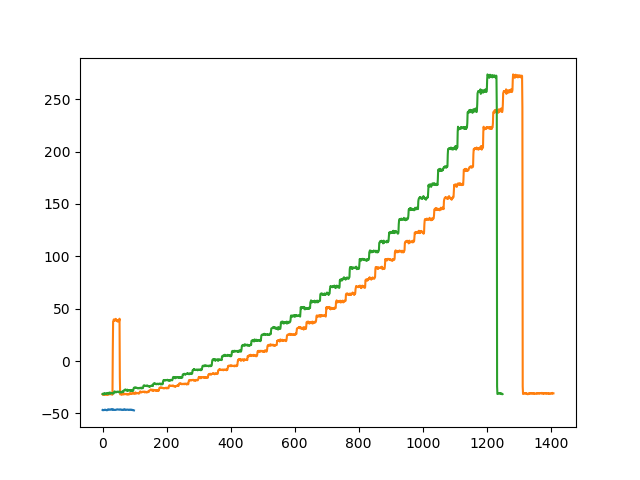

In [9]:
plt.plot(baseAvg)

In [11]:
calibPath = os.path.join(folderPath, 'Run1_00001.tif')
calib = tifffile.imread(calibPath)

In [17]:
1285 - 30*40

85

In [ ]:
ca

In [15]:
np.diff(np.array([191,221,252,283,313,344,375,406]))

array([30, 31, 31, 30, 31, 31, 31])

In [12]:
calib.shape

(1409L, 512L, 512L)

In [13]:
calib_avg = calib.mean(axis=(1,2))

In [19]:
80+41*30.5

1330.5

In [71]:
calib_crop = calib_avg[50:1330]

<IPython.core.display.Javascript object>


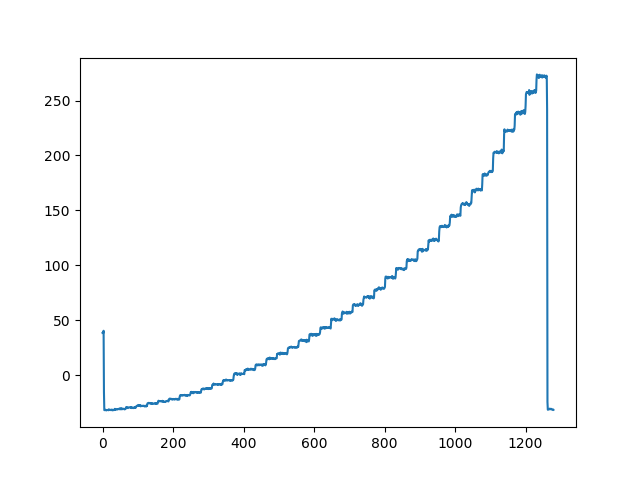

In [72]:
%matplotlib notebook
plt.plot(calib_crop)

<IPython.core.display.Javascript object>


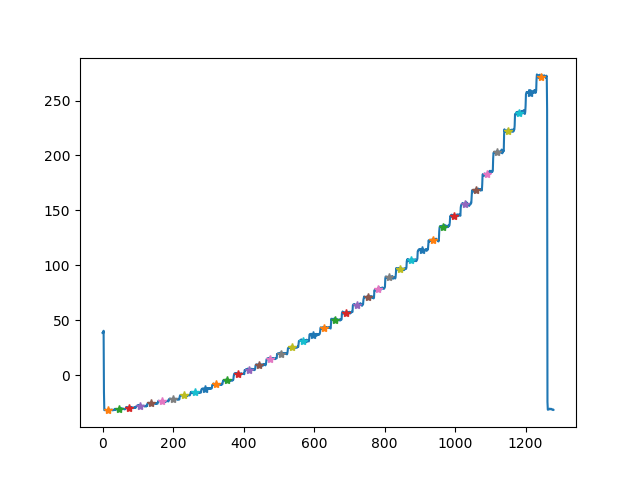

3, 28
34, 58
64, 89
95, 120
126, 150
156, 181
187, 212
218, 243
249, 273
279, 304
310, 335
341, 365
371, 396
402, 427
433, 458
464, 488
494, 519
525, 550
556, 580
586, 611
617, 642
648, 672
678, 703
709, 734
740, 764
770, 795
801, 826
832, 857
863, 887
893, 918
924, 949
955, 979
985, 1010
1016, 1041
1047, 1072
1078, 1102
1108, 1133
1139, 1164
1170, 1194
1200, 1225
1231, 1256


In [75]:
%matplotlib notebook
offset=3
#data = np.random.rand(px, px, framerate*trial_length*n_trials)
avg = np.zeros((n_trials))
plt.plot(calib_crop)
for i in range(n_trials):
    start = np.round(i * trial_frames + offset).astype(int)
    end = np.round((i + 1) * trial_frames - offset).astype(int)
    print('%d, %d' % (start, end))
    avg[i] = np.median(calib_crop[start:end])
    plt.plot((start+end) / 2, avg[i], '*')

In [62]:
end

27.5

In [ ]:
calib_crop

In [37]:
base_median

-46.0

In [67]:
avg_new = avg -  base_median

In [68]:
avg_new

array([  15.03287506,   16.51708603,   18.08395767,   20.28924561,
         22.19017792,   24.26243591,   27.53665543,   30.35229111,
         33.73756027,   37.58721542,   41.41740417,   47.24002838,
         51.14023209,   55.45884705,   61.11316681,   65.60065079,
         71.31842422,   77.59103775,   82.93338776,   89.31350708,
         96.6179924 ,  102.76633453,  109.9838295 ,  117.01686859,
        124.77391815,  134.88276672,  142.88320541,  150.8988266 ,
        159.93477631,  169.03234863,  181.21948242,  191.20398331,
        201.80760574,  214.84726715,  230.6946907 ,  249.20153046,
        268.66687012,  285.20506287,  303.37260437,  317.82773972,
         14.89095306])

In [69]:
myfit = GammaCalculator(inputs=lum_values, lums=avg_new, eq=4)


In [70]:
 myfit.gamma, myfit.a,myfit.b, myfit.k, 

(1.8111753727936832,
 0.3538286557159962,
 4.4072342768180439,
 17.069100213412554)

In [42]:
lum_values2 = np.linspace(0, 1, n_trials)

In [43]:
pridectd = myfit.a + (myfit.b +myfit.k*lum_values2)**myfit.gamma

<IPython.core.display.Javascript object>


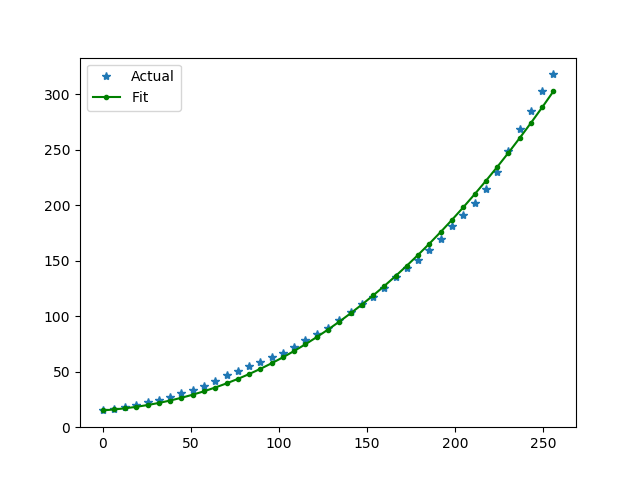

In [46]:
%matplotlib notebook
plt.plot(lum_values, avg_new, '*')
plt.plot(lum_values, pridectd, '.-g')
plt.legend(['Actual','Fit'])

## After applying the correction

In [48]:
basePath2 = os.path.join(folderPath, 'base2_00001.tif')
base2 = tifffile.imread(basePath2)

In [49]:
base2_avg = base2.mean(axis=(1,2))

In [52]:
base2_median = np.median(base2)
base2_median

-54.0

<IPython.core.display.Javascript object>


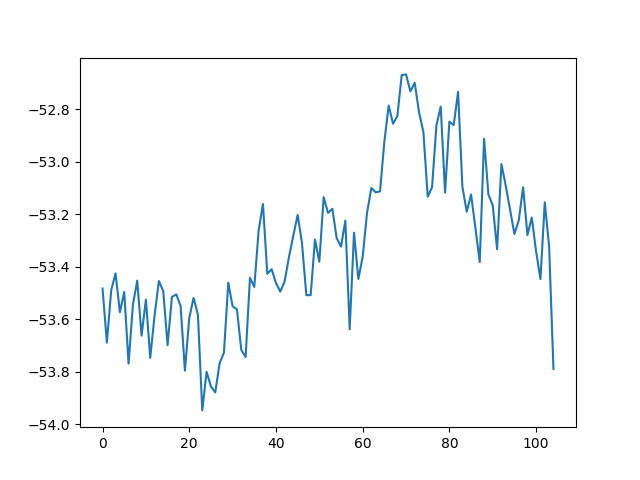

In [50]:
%matplotlib notebook
plt.plot(base2_avg)

In [53]:
calibPath2 = os.path.join(folderPath, 'Run2_00001.tif')
calib2 = tifffile.imread(calibPath2)


AttributeError: 'numpy.ndarray' object has no attribute 'sape'

In [54]:
calib2.shape

(1348L, 512L, 512L)

In [55]:
calib2_avg = calib2.mean(axis=(1,2))

<IPython.core.display.Javascript object>


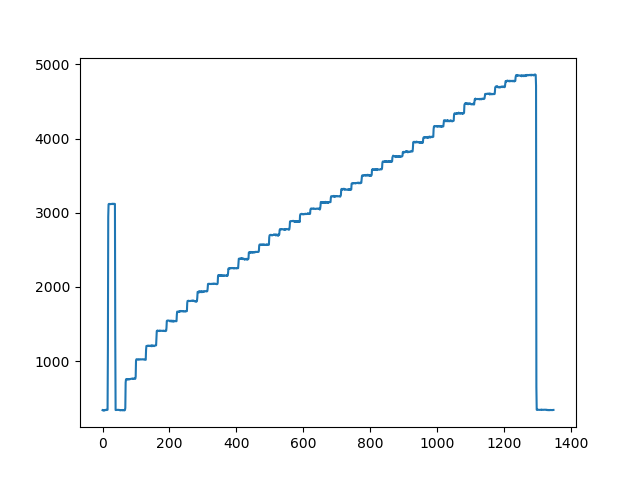

In [56]:
%matplotlib notebook
plt.plot(calib2_avg)